In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (mean_squared_error, mean_absolute_error,
    mean_absolute_percentage_error, r2_score, classification_report)
from sklearn.model_selection import (cross_validate, cross_val_score,
    ShuffleSplit, validation_curve, GridSearchCV, RandomizedSearchCV)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.tree import *
from sklearn import tree

from sklearn.datasets import *

from sklearn.model_selection import train_test_split

In [3]:
# Used to avoid zero in denominator
eps = np.finfo(float).eps
eps

2.220446049250313e-16

In [6]:
iris = load_iris()

In [7]:
X_iris,y_iris = load_iris(as_frame = True,return_X_y=True)


In [8]:
wine = load_wine()
X_wine, y_wine = load_wine(as_frame = True, return_X_y = True)

# Calculating Entropy of whole dataset

In [9]:
def find_entropy_whole(X, y):
    
    #initialization
    overall_entropy = 0
    
    values_in_target = y.unique()
    
    for value in values_in_target:
        p = y.value_counts()[value]/len(y)
        overall_entropy += -p * np.log2(p)
        
    return overall_entropy

    

In [10]:
find_entropy_whole(X_iris,y_iris)

1.584962500721156

In [11]:
find_entropy_whole(X_wine, y_wine)

1.5668222768551812

# calculating entropy of each attribute

In [12]:
def find_entropy_of_attribute(X,y,attribute):
    
    values_in_target = y.unique()
    
    values_in_attribute = X[attribute]
    entropy_attribute = 0
    
    for value_in_attribute in values_in_attribute:
        overall_entropy = 0
        
        for value_in_target in values_in_target:
            num = len(X[attribute][X[attribute] == value_in_attribute][y == value_in_target])
            den = len(X[attribute][X[attribute] == value_in_attribute])
            p = num/(den + eps)
            overall_entropy += -p * np.log2(p+eps)
        p2 = den/len(df)
        entropy_attribute += -p2 * overall_entropy
        
    return abs(entropy_attribute)

In [14]:
df = pd.concat([X_iris, y_iris], axis=1)

In [15]:
for i_attribute in X_iris.keys():
    print(f"Entropy of attribute {i_attribute} is : ",
             find_entropy_of_attribute(X_iris, y_iris ,i_attribute))

Entropy of attribute sepal length (cm) is :  4.810927488201115
Entropy of attribute sepal width (cm) is :  14.871748185009563
Entropy of attribute petal length (cm) is :  0.8188697572150728
Entropy of attribute petal width (cm) is :  1.3664095301147063


In [16]:
for i_attribute in X_wine.keys():
    print(f"Entropy of attribute {i_attribute} is : ",
             find_entropy_of_attribute(X_wine, y_wine ,i_attribute))

Entropy of attribute alcohol is :  0.7021554168830128
Entropy of attribute malic_acid is :  1.0822133858471503
Entropy of attribute ash is :  4.0758845968674695
Entropy of attribute alcalinity_of_ash is :  8.2541434461999
Entropy of attribute magnesium is :  7.074414477020784
Entropy of attribute total_phenols is :  2.0132495794625442
Entropy of attribute flavanoids is :  0.40830074998557647
Entropy of attribute nonflavanoid_phenols is :  9.309518106725385
Entropy of attribute proanthocyanins is :  2.5866870296788393
Entropy of attribute color_intensity is :  0.6820250834919872
Entropy of attribute hue is :  2.6705329412631746
Entropy of attribute od280/od315_of_diluted_wines is :  0.7887524325244956
Entropy of attribute proline is :  1.0688131148903375


# finding the best attribute

In [17]:
def find_best_attribute_to_divide(X, y):
    # return the attribute with lowes entropy
    
    # information gain
    IG = []
    
    # all the column names
    all_attribute_names = X.keys()
    
    for attribute in all_attribute_names:
        # compute information gain for every attribute
        IG.append(find_entropy_whole(X,y) - find_entropy_of_attribute(X,y, attribute))
    
    # get the index of attribute with the best information gain
    index_of_attribute_with_max_IG = np.argmax(IG)
    
    # print(index_of_attriute_with_max_IG)
    best_attribute = all_attribute_names[index_of_attribute_with_max_IG]
    
    return (best_attribute)


In [18]:
find_best_attribute_to_divide(X_iris, y_iris)

'petal length (cm)'

In [19]:
find_best_attribute_to_divide(X_wine, y_wine)

'flavanoids'

# Building Decision Tree

In [20]:
def buildTree(X, y, tree = None):
    temp_df = pd.concat([X,y], axis=1)
    
    # Get attribute with maximum information gain
    node = find_best_attribute_to_divide(X,y)
    
    # Get distinct value of that attribute
    attValue = np.unique(temp_df[node])
    
    # Create an empty dictionary to create tree
    if tree is None:
        tree = {}
        tree[node] = {}
    
    
    # We make loop to construct a tree by calling this function recursively.
    # In this we check if the subset is pure and stops if it is pure
    for value in attValue:
        subtable = temp_df[temp_df[node] == value].reset_index(drop = True)
        
        print(subtable) ## test
        
        clValue, counts = np.unique(subtable['target'], return_counts = True)
        print("*"*10)
        print(tree)
        print("*"*10)
        print("value",value)
        print("*"*10)
        print("clvalue", clValue)
        print("treevalue",tree[node][value])
        if (len(counts) == 1): # checking purity of subsets
            tree[node][value] == clValue[0]
        else:
            tree[node][value] = buildTree(subtable) # Calling the function recursively
        
    return tree
    

In [21]:
#buildTree(X_iris,y_iris)

In [23]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, random_state=42, test_size=0.2)

In [24]:
dt_iris = DecisionTreeClassifier()
dt_iris.fit(X_iris_train, y_iris_train)

DecisionTreeClassifier()

In [26]:
y_iris_pred = dt_iris.predict(X_iris_test)

In [27]:
print(classification_report(y_iris_test, y_iris_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Plotting Iris decision tree

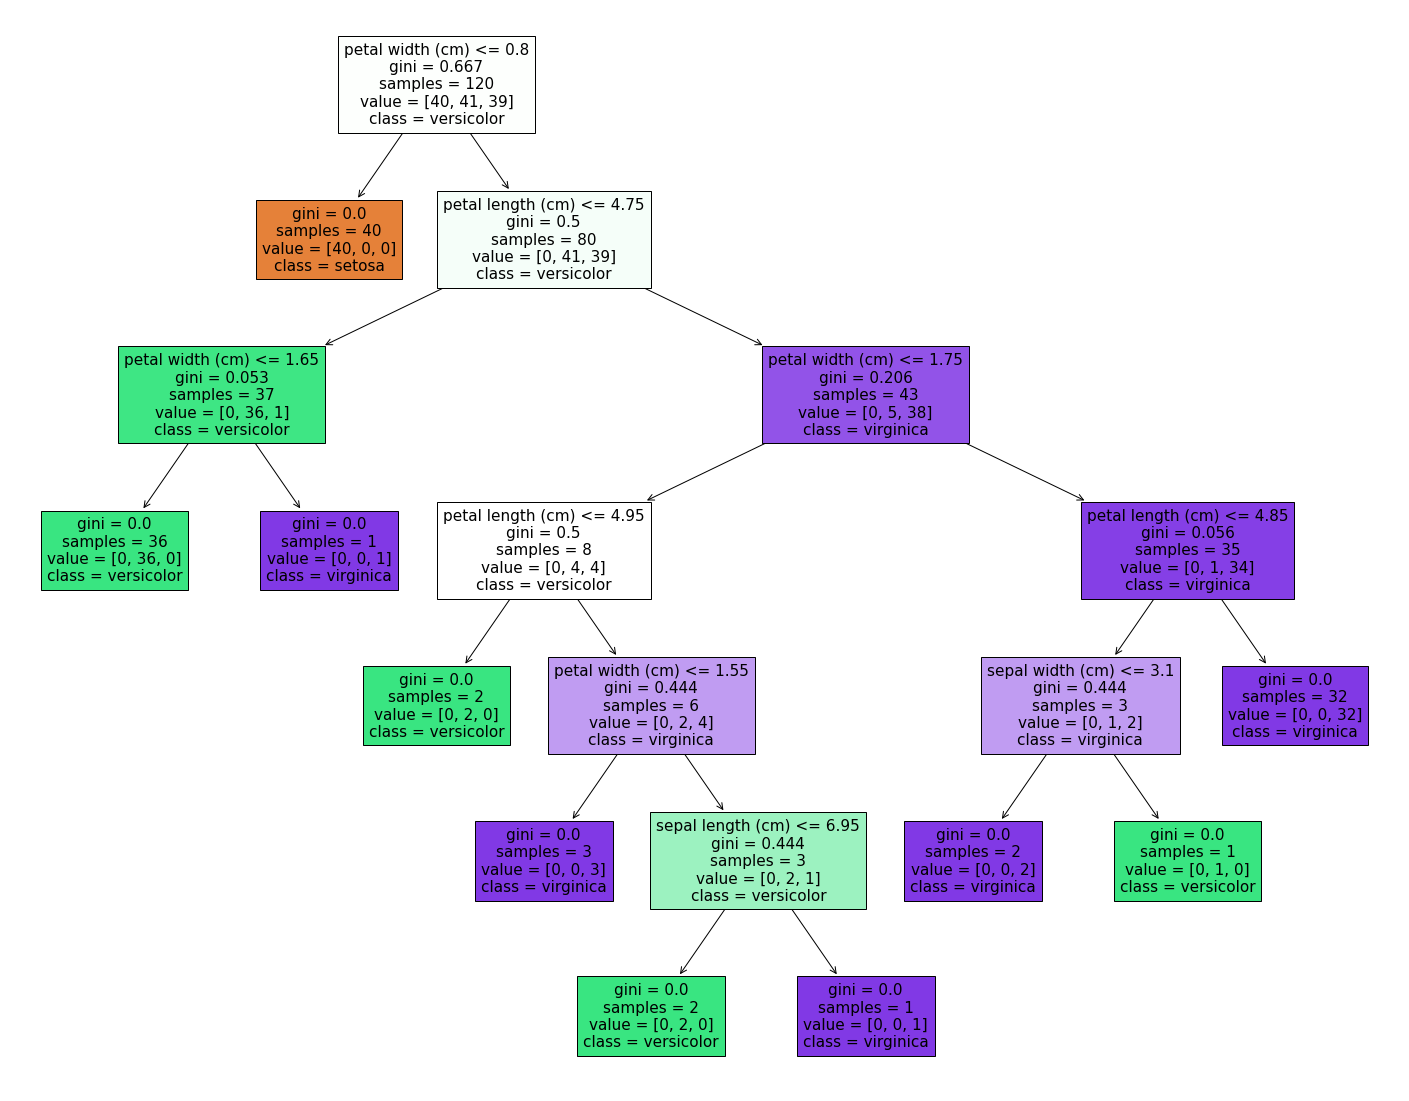

In [32]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_iris, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [33]:
X_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [34]:
dt_temp = DecisionTreeClassifier()
dt_temp.fit(X_iris[["petal length (cm)", "petal width (cm)"]], y_iris)

DecisionTreeClassifier()

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(dt_temp, X_iris[["petal length (cm)", "petal width (cm)"]], y_iris)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

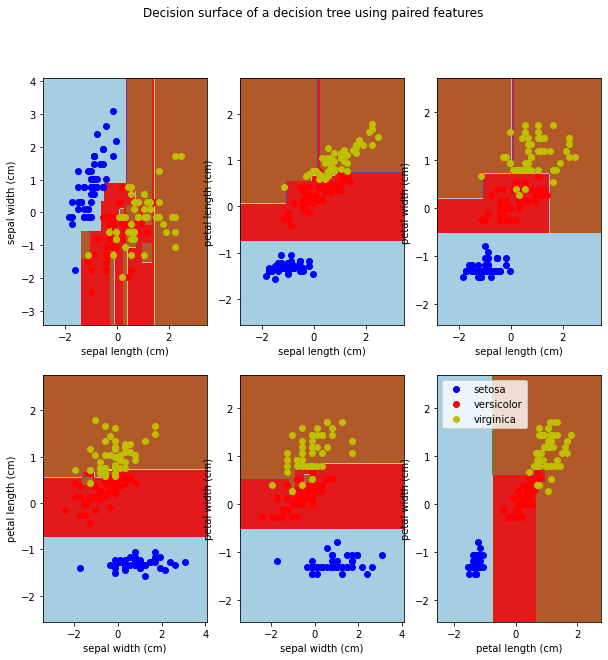

In [35]:

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()
plt.figure(figsize = (10,10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

# wine dataset

In [36]:
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, random_state=42, test_size=0.2)

In [37]:
dt_wine = DecisionTreeClassifier()
dt_wine.fit(X_wine_train, y_wine_train)

DecisionTreeClassifier()

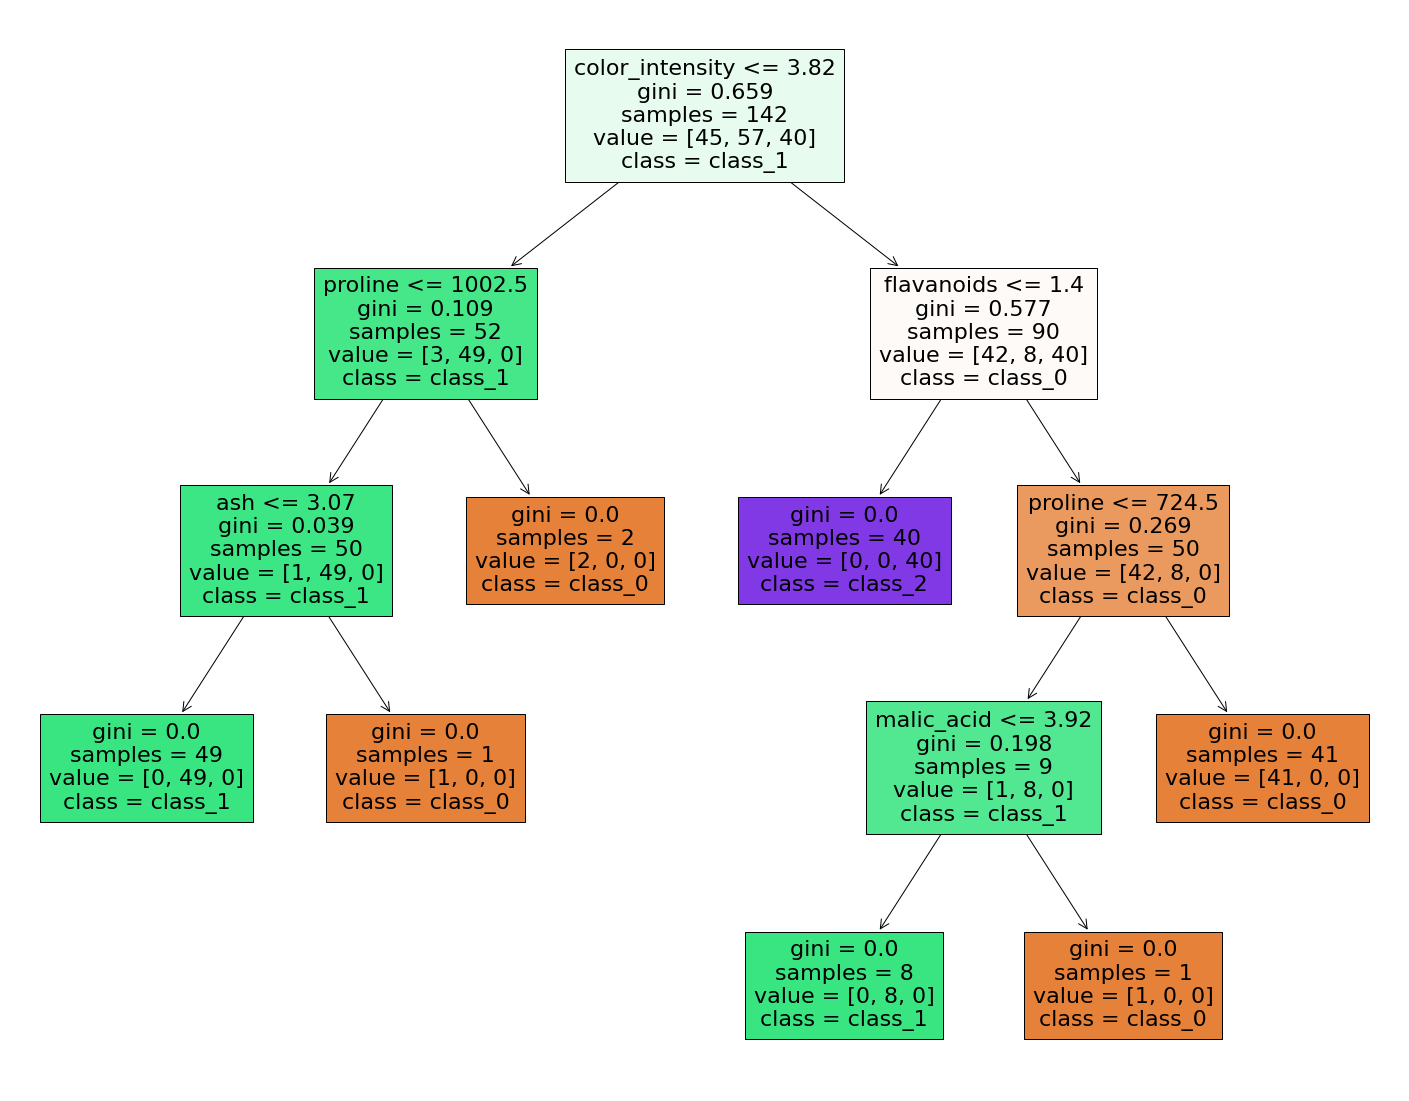

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_wine, 
                   feature_names=wine.feature_names,  
                   class_names=wine.target_names,
                   filled=True)

In [39]:
y_wine_pred = dt_wine.predict(X_wine_test)

In [40]:
print(classification_report(y_wine_test, y_wine_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



# MLP

In [43]:
np.random.seed(306)

### Let's use ShuffleSplit as dv with 10 split and 20% sexamples set aside as text examples

In [44]:
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)

# Loading dataset

In [45]:
features, labels = fetch_california_housing(as_frame = True, return_X_y = True)

# Train-Test split
com_train_features, test_features, com_train_labels, test_labels = train_test_split(
    features, labels, random_state = 42)

# train --> train + dev split

train_features, dev_features, train_labels, dev_labels = train_test_split(
    com_train_features, com_train_labels, random_state = 42)

# Model Setup

In [63]:
dt_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                           ("dt_reg", DecisionTreeRegressor(max_depth = 3, random_state = 42))])

dt_reg_cv_results = cross_validate(dt_reg_pipeline,
                                    com_train_features, com_train_labels,
                                  cv = cv, scoring = "neg_mean_absolute_error",
                                  return_train_score = True,
                                  return_estimator = True)

dt_reg_train_error = -1 * dt_reg_cv_results['train_score']
dt_reg_test_error = -1 * dt_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set: \n"
      f"{dt_reg_train_error.mean() :.3f} +/- {dt_reg_train_error.std():.3f}")

print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{dt_reg_test_error.mean():.3f} +/- {dt_reg_test_error.std():.3f}")


Mean absolute error of linear regression model on the train set: 
0.590 +/- 0.005
Mean absolute error of linear regression model on the test set:
0.593 +/- 0.007


In [52]:
print(dt_reg_cv_results.keys())
print(dt_reg_cv_results['test_score'])

dict_keys(['fit_time', 'score_time', 'estimator', 'test_score', 'train_score'])
[-0.58946966 -0.58927168 -0.59642853 -0.58912787 -0.58865453 -0.60323515
 -0.60339571 -0.58038098 -0.59434955 -0.59237896]


# Visualizing the tree

In [53]:
dt_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('st_reg',
                 DecisionTreeRegressor(max_depth=3, random_state=42))])

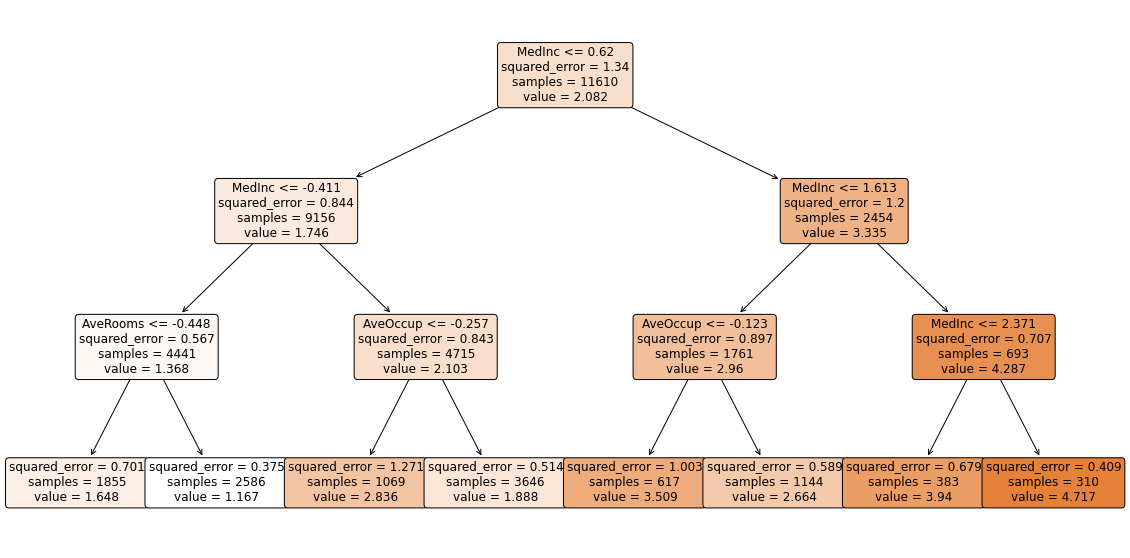

In [59]:
plt.figure(figsize = (20,10), facecolor = 'w')

# create tree plot
a = tree.plot_tree(dt_reg_pipeline[-1],
             # use the feature names stored,
             feature_names = features.columns,
             rounded = True,
             filled = True,
             fontsize = 12)
plt.show()

# Using the tree for prediction

In [60]:
test_labels_pred = dt_reg_pipeline.predict(test_features)

# Evaluating the tree

In [61]:
mae = mean_absolute_error(test_labels, test_labels_pred)
mse = mean_squared_error(test_labels, test_labels_pred)
r2 = r2_score(test_labels, test_labels_pred)

print("The model performance for testing set")
print("--------------------------------------")
print("MAE is ", mae)
print("MSE is ", mse)
print('R2 Score is ', r2)

The model performance for testing set
--------------------------------------
MAE is  0.6005762942842664
MSE is  0.6417557936098145
R2 Score is  0.5150037690483743


### Tuning hyperparameters 

In [64]:
param_grid = {'dt_reg__max_depth': range(1,20),
              'dt_reg__min_samples_split': range(2,8)}

dt_grid_search = GridSearchCV(dt_reg_pipeline, 
                                 param_grid = param_grid,
                                 n_jobs = 2,
                                 cv = cv,
                                 scoring = "neg_mean_absolute_error",
                                 return_train_score = True)

dt_grid_search.fit(com_train_features, com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('feature_scaling', StandardScaler()),
                                       ('dt_reg',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=42))]),
             n_jobs=2,
             param_grid={'dt_reg__max_depth': range(1, 20),
                         'dt_reg__min_samples_split': range(2, 8)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [66]:
print("The best parameters value is: ", dt_grid_search.best_params_)

The best parameters value is:  {'dt_reg__max_depth': 11, 'dt_reg__min_samples_split': 5}


### Lets retrain the model with the best hyperparameter value.

In [65]:
dt_reg_pipeline.set_params(
    dt_reg__max_depth = 11, dt_reg__min_samples_split = 5).fit(
        com_train_features, com_train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=11, min_samples_split=5,
                                       random_state=42))])

In [67]:
test_labels_pred = dt_reg_pipeline.predict(test_features)
mae = mean_absolute_error(test_labels, test_labels_pred)
mse = mean_squared_error(test_labels, test_labels_pred)
r2 = r2_score(test_labels, test_labels_pred)


In [68]:

print("The model performance for testing set")
print("--------------------------------------")
print("MAE is ", mae)
print('MSE is ', mse)
print('R2 score is ',r2)

The model performance for testing set
--------------------------------------
MAE is  0.4248952183820017
MSE is  0.4154957726373763
R2 score is  0.6859960039130073
